the classification report is:                precision    recall  f1-score   support

      action        0.54      0.11      0.18      1314
       adult        0.50      0.06      0.11       590
   adventure        0.81      0.07      0.13       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7446
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13096
       drama        0.46      0.82      0.59     13612
      family        0.50      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.32      0.48       193
     history        0.00      0.00      0.00       243
      horror        0.69      0.36      0.47      2204
       music        0.74      0.15      0.25       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00

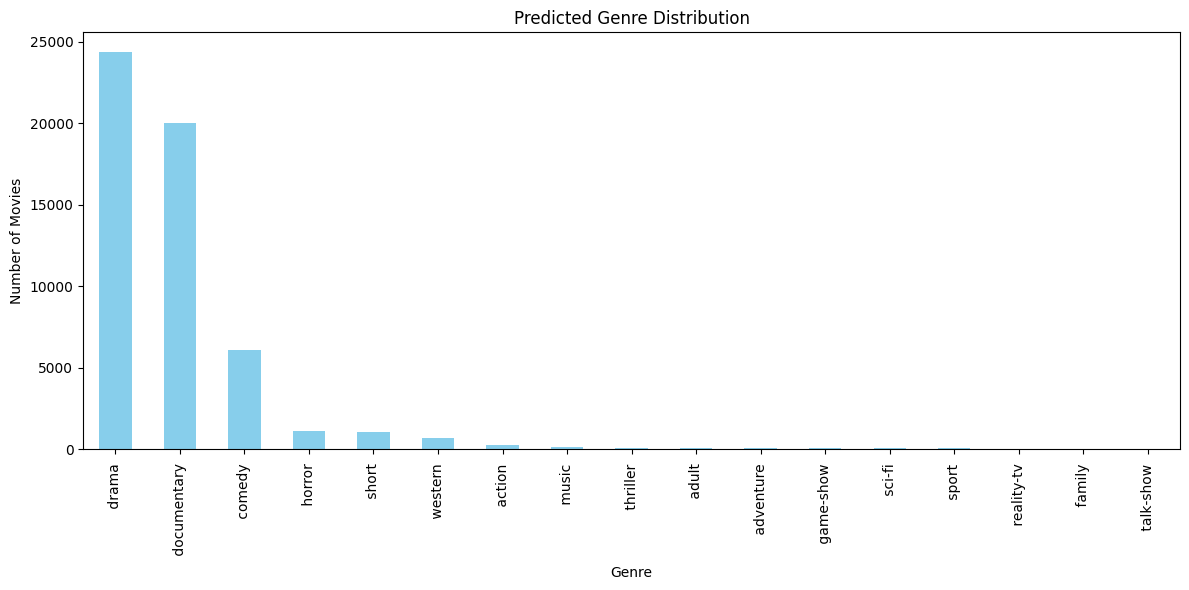

In [ ]:
#importing libraries
import pandas as pd   # For handling data in tabular form
import zipfile   #To extract the zip file
from sklearn.feature_extraction.text import TfidfVectorizer#For convaertting text to features
from sklearn.naive_bayes import MultinomialNB #Classification model
from sklearn.metrics import classification_report, accuracy_score #For evaluating the model
from google.colab import files
import matplotlib.pyplot as plt #importing matplotlib library features


#Extracting the training data zip file
with zipfile.ZipFile('/content/drive/MyDrive/data/train_data.txt.zip', 'r') as ref:
    ref.extractall()

#Extracting the Test data zip file
with zipfile.ZipFile('/content/drive/MyDrive/data/test_data_solution.txt (1).zip', 'r') as zip_ref:
    zip_ref.extractall()

#Reading the training data into a dataframe
df_train = pd.read_csv('/content/drive/MyDrive/data/train_data.txt.zip', sep=':::', header=None,engine='python',names=['index','movie_name','genre','plot'],quoting=3,lineterminator=None,encoding="utf-8")

#Reading the test data into a dataframe
df_test = pd.read_csv('/content/drive/MyDrive/data/test_data_solution.txt (1).zip', sep=':::', header=None,engine='python',names=['index','movie_name','genre','plot'],quoting=3,lineterminator=None,encoding="utf-8")

#Preprocessing the ttraining data
df_train=df_train.dropna(subset=['plot'])   #dropping the row with missing plot
df_train['plot']=df_train['plot'].astype(str)  #converting the column features in string type
df_train['plot']=df_train['plot'].str.lower() #  Converting plot text to lowercase

#Preprocessing the testing data
df_test=df_test.fillna("") # Filling any missing values with empty strings
df_test['plot']=df_test['plot'].astype(str)
df_test['plot']= df_test['plot'].str.lower()

#seperating features(X)and label(Y) into train data and test data
X1=df_train['plot']
y1=df_train['genre']
X2=df_test['plot']
y2=df_test['genre']

#Converted the text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
X_train= tfidf_vectorizer.fit_transform(X1)
X_test = tfidf_vectorizer.transform(X2)


# Training the Naive Bayes classifier
model=MultinomialNB()
model.fit(X_train,y1)
y_pred=model.predict(X_test)# Predicted genres for the test data

#printind the evalauted values for model performance
print("the classification report is:",classification_report(y2,y_pred,zero_division=0))
print("the accuracy of the score is:",accuracy_score(y2,y_pred))

# Converted predictions to a Series for easy plotting
predicted_genres = pd.Series(y_pred)

# Counted each predicted genre
genre_counts = predicted_genres.value_counts()

# Ploting the bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')

plt.title('Predicted Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

